This notebook pulls in the JSON from the getData.activities app file. I've saved the data locally for ease of use but you can either call the class into this notebook or incorporate some cells from this notebook into the main app as an additional class.
The rest of the notebook cleans and organizes the activities data and then trials some visualisations and applications

In [21]:
# Import packages
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [22]:
# Select fields of interest for the dataframe and format datetime
data = open("data.json","r")
activities = json.loads(data.read())
df= pd.DataFrame(activities)
df= df[["athlete","name","distance","moving_time","elapsed_time","start_latlng","total_elevation_gain","type","average_temp","start_date_local","location_city","location_country","kudos_count","average_speed","max_speed","has_heartrate","average_heartrate","max_heartrate","elev_high","elev_low","pr_count"]]
df['start_date_local']=pd.to_datetime(df['start_date_local'])
df['start_time']=df['start_date_local'].dt.time
df['start_date']=df['start_date_local'].dt.date
df['start_date']=pd.to_datetime(df['start_date'])
df['start_time']= pd.to_datetime(df['start_time'], format='%H:%M:%S')
df.head(5)

,athlete,name,distance,moving_time,elapsed_time,start_latlng,total_elevation_gain,type,average_temp,start_date_local,...,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,start_time,start_date
0,"{'id': 41223837, 'resource_state': 1}",Morning Run,9123.6,2789,2843,"[51.54054220765829, -0.15161932446062565]",119.5,Run,NaN,2023-06-07 08:08:04+00:00,...,3.271,4.553,True,144.5,172.0,114.9,31.1,0,1900-01-01 08:08:04,2023-06-07
1,"{'id': 41223837, 'resource_state': 1}",Morning Ride,112765.0,19969,24624,"[51.24082714319229, -0.32408284954726696]",1541.0,Ride,15.0,2023-06-05 10:21:31+00:00,...,5.647,15.594,False,NaN,NaN,244.4,14.8,30,1900-01-01 10:21:31,2023-06-05
2,"{'id': 41223837, 'resource_state': 1}",Afternoon Swim,1200.0,1455,1705,[],0.0,Swim,NaN,2023-06-02 13:00:29+00:00,...,0.825,5.797,False,NaN,NaN,NaN,NaN,0,1900-01-01 13:00:29,2023-06-02
3,"{'id': 41223837, 'resource_state': 1}",Lunch Run,16040.2,4445,4512,"[51.54071470722556, -0.15175343491137028]",140.9,Run,NaN,2023-06-01 11:53:27+00:00,...,3.609,6.012,True,158.7,186.0,114.9,29.0,7,1900-01-01 11:53:27,2023-06-01
4,"{'id': 41223837, 'resource_state': 1}",Morning Run,10250.1,3375,3413,"[51.54023543000221, -0.151614211499691]",136.6,Run,NaN,2023-05-31 07:22:34+00:00,...,3.037,5.327,True,134.7,156.0,114.9,31.1,6,1900-01-01 07:22:34,2023-05-31


In [23]:
#Separate the acitivities into types
df=df.loc[df['type']!= "Swim"]
df["pace"]= df["average_speed"]*3.6
df.reset_index(inplace=True)

runs= df.loc[df["type"]=="Run"]
runs['pace']= 1000/(runs["average_speed"]*60)
short_runs= runs.loc[df["distance"] <= 10000]
runs.reset_index(inplace=True)

rides=df.loc[df["type"]=="Ride"]
rides["pace"]= rides["average_speed"]*3.6
rides.reset_index(inplace=True)

/var/folders/_s/k6zmybnj6j1cgzb3bwm8bkym0000gn/T/ipykernel_13838/201888499.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['pace']= 1000/(runs["average_speed"]*60)
/var/folders/_s/k6zmybnj6j1cgzb3bwm8bkym0000gn/T/ipykernel_13838/201888499.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides["pace"]= rides["average_speed"]*3.6


Now we have the dataframes and fields of interest, we can explore some visualisations.
Elevation
- Am I slower when there is more elevation?
- Does elevation affect my run or bike more?
- Is there a threshold level of elevation where performance drops a lot?

Length of time
- How much affect do longer workouts have on my pace?
- If I take a period of rest, how much condition do I lose?

Kudos
- Which of my runs get the most kudos?
- What are the key features of my most liked workouts?


Text(0.5, 1.0, 'Average Speed vs elevation')

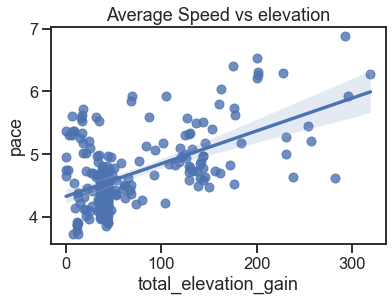

In [35]:
sns.set(style="ticks", context="talk")
sns.regplot(x='total_elevation_gain', y = 'pace', data = runs).set_title("Average Speed vs elevation")


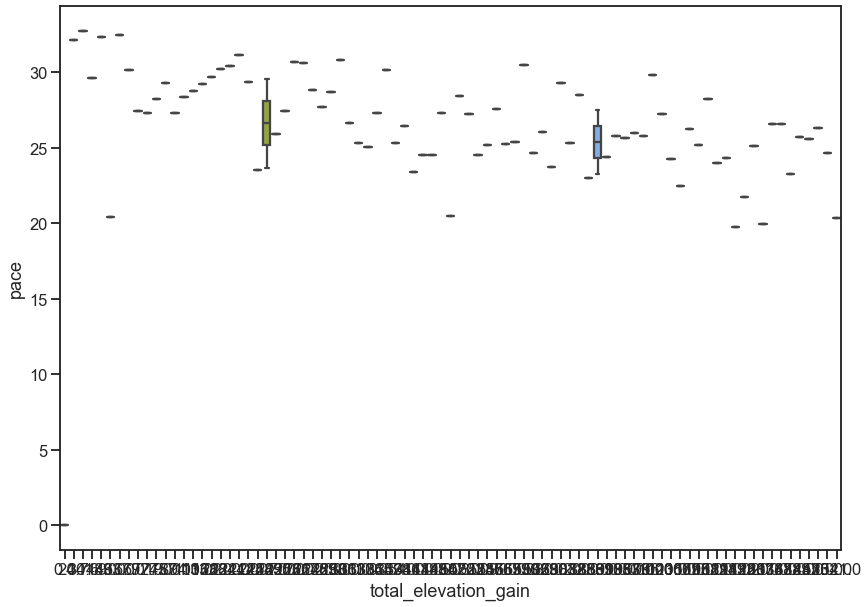

In [36]:
def bike_print_boxplot(feature, figsize=(14, 10)):
    data = pd.concat([rides['pace'], rides[feature]], axis=1)
    f, ax = plt.subplots(figsize=figsize)
    fig = sns.boxplot(x=feature, y="pace", data=data)
## Try your function to plot 'grade' vs 'price'.
bike_print_boxplot('total_elevation_gain')

/var/folders/_s/k6zmybnj6j1cgzb3bwm8bkym0000gn/T/ipykernel_13838/822235533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides["elevation_cat"]= pd.cut(


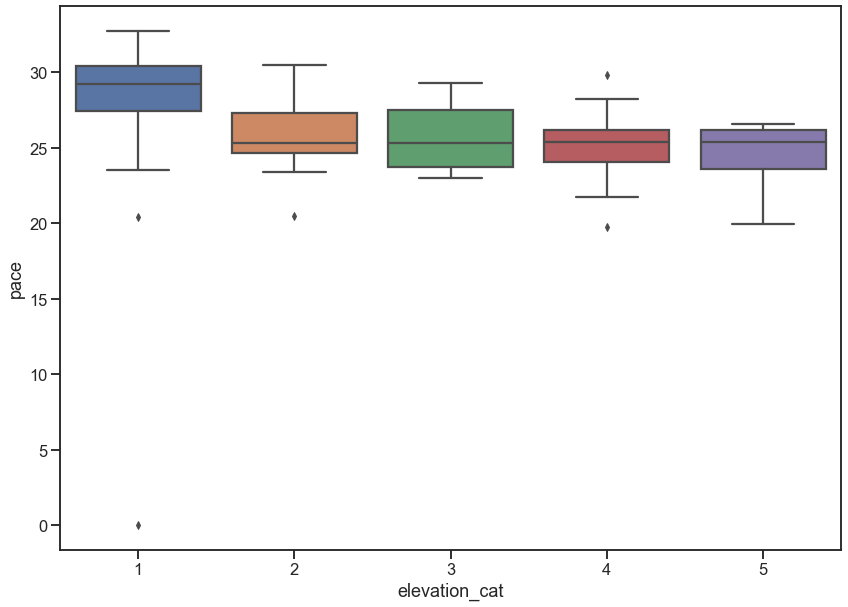

In [37]:
#Too many different elevations so group them.
rides["elevation_cat"]= pd.cut(
    rides.total_elevation_gain,
    bins=5,
    labels=[1,2,3,4,5]
)
bike_print_boxplot('elevation_cat')

/var/folders/_s/k6zmybnj6j1cgzb3bwm8bkym0000gn/T/ipykernel_13838/83364703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides["distance_cat"]= pd.cut(


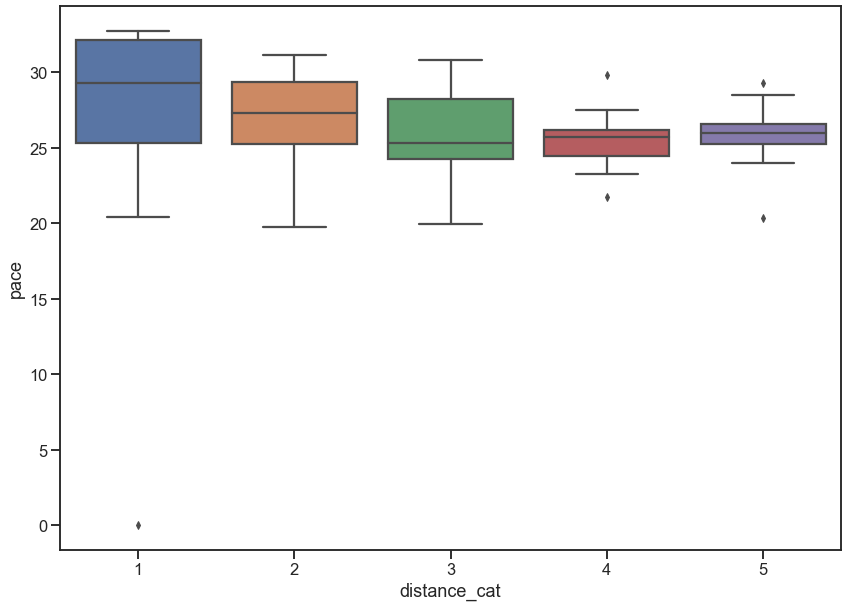

In [38]:
# Let's check the same for distance
rides["distance_cat"]= pd.cut(
    rides.distance,
    bins=5,
    labels=[1,2,3,4,5]
)
bike_print_boxplot('distance_cat')

/var/folders/_s/k6zmybnj6j1cgzb3bwm8bkym0000gn/T/ipykernel_13838/3074807594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs["elevation_cat"]= pd.cut(


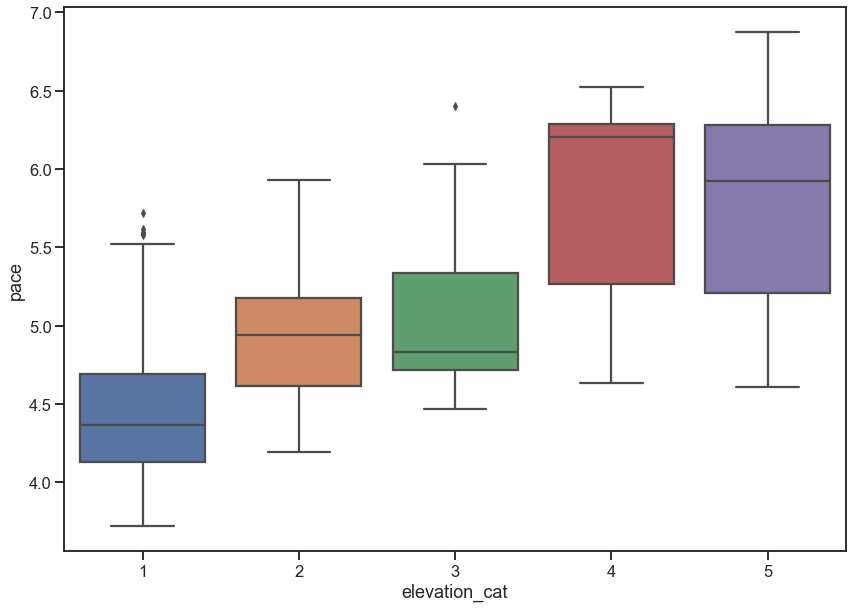

In [39]:
#Is it the same for running?
def run_print_boxplot(feature, figsize=(14, 10)):
    data = pd.concat([runs['pace'], runs[feature]], axis=1)
    f, ax = plt.subplots(figsize=figsize)
    fig = sns.boxplot(x=feature, y="pace", data=data)

runs["elevation_cat"]= pd.cut(
    runs.total_elevation_gain,
    bins=5,
    labels=[1,2,3,4,5]
)
run_print_boxplot('elevation_cat')

/var/folders/_s/k6zmybnj6j1cgzb3bwm8bkym0000gn/T/ipykernel_13838/960582960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs["distance_cat"]= pd.cut(


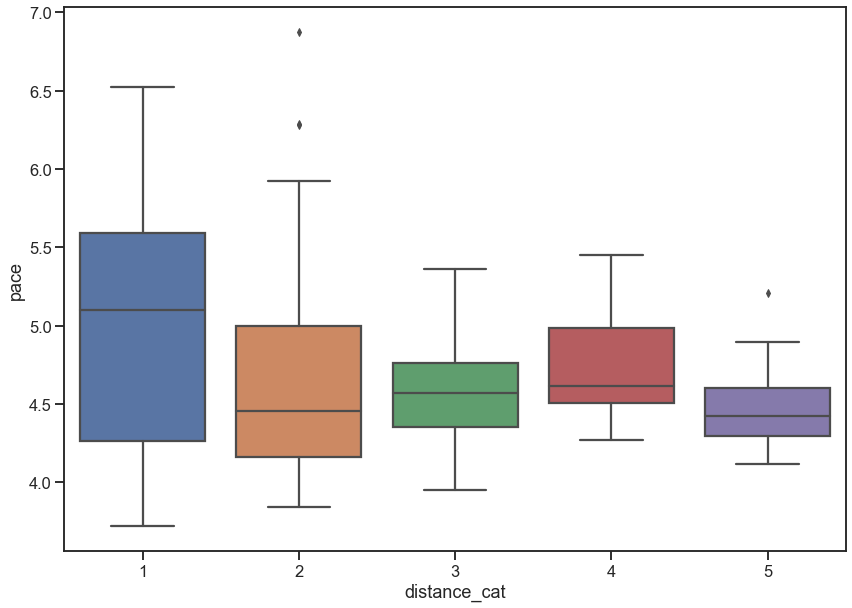

In [47]:
runs["distance_cat"]= pd.cut(
    runs.distance,
    bins=5,
    labels=[1,2,3,4,5]
)
run_print_boxplot('distance_cat')

Text(0.5, 1.0, 'Average Speed vs Distance on Short Runs (<10,000)')

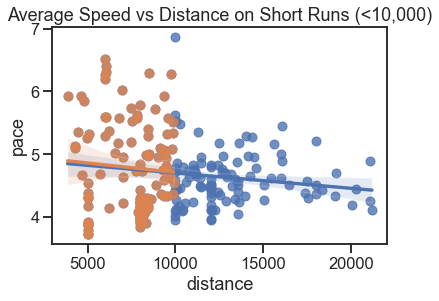

In [48]:
sns.set(style="ticks", context="talk")
sns.regplot(x='distance', y = 'pace', data = runs).set_title("Average Speed vs Distance")

sns.set(style='ticks', context='talk')
sns.regplot(x='distance',y='pace',data=short_runs).set_title("Average Speed vs Distance on Short Runs (<10,000)")

It looks like distance and elevation affect my runs and bikes. Time to quantify the relationships so I can answer does elevation affect my run or my bike pace more? Does distance affect my run or my bike more? Are there threshold levels where my performance deteriorates?

### Kudos ###

How are my most kudoed runs classified? Is there a feature that stands out?
- Correlation matrix
- Classifier of activities then examine if there is a high proportion of kudoed runs in the same category
- Importance scores

In [54]:
most_kudos= df.loc[df['kudos_count'].idxmax()]
fastest_ride= rides.loc[rides['kudos_count'].idxmax()]
fastest_ride

level_0                                                   112
index                                                     114
athlete                 {'id': 41223837, 'resource_state': 1}
name                                             Morning Ride
distance                                              82214.3
moving_time                                             11473
elapsed_time                                            12942
start_latlng                           [51.445275, -0.151205]
total_elevation_gain                                    910.0
type                                                     Ride
average_temp                                             10.0
start_date_local                    2021-04-04 10:52:57+00:00
location_city                                            None
location_country                                         None
kudos_count                                                16
average_speed                                           7.166
max_spee

### Training over time ###

*Now I have examined my individual workouts I want to look at my training.*
- Is there a number/intensity/consistency of workouts which means I bike or run faster on average? Maybe I do the same workouts with less effort? 
- Is there a number/intensity/consistency of workouts where I lose condition? 

To answer both these questions I need a metric of my fitness. A course-adjusted moving average of my pace or effort

/var/folders/_s/k6zmybnj6j1cgzb3bwm8bkym0000gn/T/ipykernel_13838/791461470.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


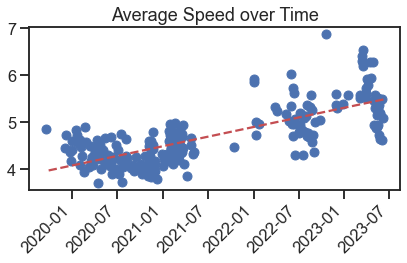

In [49]:
fig = plt.figure() #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
x = np.asarray(runs.start_date)  #convert data to numpy array
y = np.asarray(runs.pace)
ax1.plot_date(x, y) #plot data points in scatter plot on ax1
ax1.set_title('Average Speed over Time')
#ax1.set_ylim([0,5])

#add trend line
x2 = mdates.date2num(x)
z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')

#format the figure and display
fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

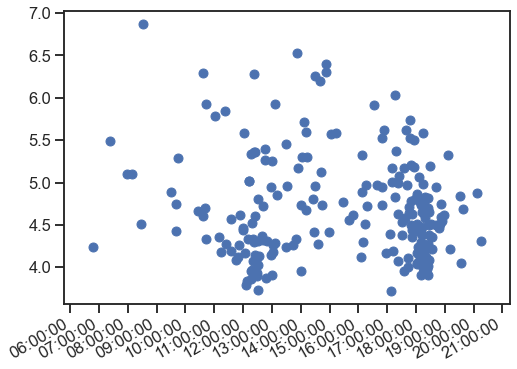

In [50]:
'''
fig = plt.figure() #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
x = np.asarray(runs.start_time)  #convert data to numpy array
y = np.asarray(runs.pace)
ax1.plot(x, y) #plot data points in scatter plot on ax1
ax1.set_title('Average Speed over Time')
#ax1.set_ylim([0,5])

#add trend line

x2 = mdates.date2num(x)
z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')
'''

#format the figure and display
fig, ax = plt.subplots(figsize=(8,6))
x = np.asarray(runs.start_time)  #convert data to numpy array
y = np.asarray(runs.pace)

ax.plot_date(x,y)
ax.set_xlim(runs['start_time'].min()-pd.Timedelta(1,'h'),
            runs['start_time'].max()+pd.Timedelta(1,'h'))

ax.xaxis.set_major_locator(md.HourLocator(interval = 1))
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

fig.autofmt_xdate()

plt.show()